# Challenge

## WADE El Hadji Malick

In [104]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns
import math
from random import *

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
import xgboost

from sklearn.metrics import auc, log_loss, recall_score, precision_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef, accuracy_score, roc_auc_score,roc_curve

import sklearn.metrics

import warnings

# On ignore les avertissements des classes de modéles
warnings.filterwarnings("ignore", category=DeprecationWarning)

# On sauvegarde nos modéles finales
from sklearn.externals import joblib # save and load models

# # save the model to disk
# filename = 'modeles/SVM'
# joblib.dump(SVM, filename)

# # load the model from disk
# loaded_model = joblib.load(filename)

ImportError: cannot import name 'accuracy' from 'sklearn.metrics' (/opt/conda/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

## 1. Chargement des données

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path_Home = "/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/data_challenge"
#path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension"

Xtrainchallenge = pd.read_csv(path_Home + "/Xtrainchallenge.txt",  sep=' ')
Ytrainchallenge = pd.read_csv(path_Home + "/Ytrainchallenge.txt",  sep=' ')

Xtestchallenge = pd.read_csv(path_Home + "/Xtestchallenge.txt",  sep=' ')

In [3]:
print("Données Train:")
print ("Lignes: " ,Xtrainchallenge.shape[0])
print ("Colonnes: " ,Xtrainchallenge.shape[1])

print("----")

print("Données Test:")
print ("Lignes: " ,Xtestchallenge.shape[0])
print ("Colonnes: " ,Xtestchallenge.shape[1])

Données Train:
Lignes:  1000
Colonnes:  500
----
Données Test:
Lignes:  1000
Colonnes:  500


In [4]:
Xtrainchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [5]:
Xtestchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1001,482,538,473,485,576,479,489,477,473,479,495,527,439,485,465,523,477,466,502,478,479,466,484,481,492,465,478,481,469,488,472,551,521,536,472,510,499,513,475,476,476,476,507,493,523,446,492,513,498,452,601,482,476,478,524,473,461,501,588,466,487,487,491,483,453,544,504,477,484,477,520,494,492,475,476,522,474,471,461,487,511,524,409,467,510,517,474,478,483,561,476,460,457,527,483,543,484,449,484,498,466,478,482,477,480,462,473,558,535,485,490,491,482,473,530,493,463,489,488,473,477,484,486,505,437,497,501,499,476,435,476,490,473,475,427,513,505,475,480,476,496,527,489,479,464,495,477,510,485,512,430,489,465,432,476,498,503,448,481,469,476,480,488,477,485,492,475,482,475,545,478,554,422,479,475,444,501,479,486,497,508,513,478,487,499,474,499,493,489,471,486,494,486,444,525,478,471,484,476,484,519,498,527,555,498,474,473,481,467,478,511,467,470,485,481,501,549,473,532,484,447,539,510,535,522,463,492,477,477,493,490,481,471,485,445,519,502,473,469,489,485,562,458,464,540,482,463,472,475,529,508,499,482,503,477,438,487,423,491,512,485,479,485,443,485,502,447,517,551,504,495,517,510,512,469,499,476,522,468,419,476,439,460,475,537,471,502,544,483,469,478,537,541,474,489,532,507,489,484,483,480,491,475,463,512,477,463,487,510,459,491,478,559,493,462,462,470,471,449,466,483,494,489,489,484,483,465,489,482,538,532,470,476,491,571,487,422,546,526,472,542,469,471,554,507,476,488,563,496,484,477,493,452,494,488,455,495,478,491,514,446,496,495,506,475,461,504,486,482,523,484,462,507,480,506,497,476,522,518,446,475,452,498,479,503,461,537,477,477,440,466,472,478,508,481,507,489,487,519,474,47

In [6]:
# On regroupe les données
Xchallenge = pd.concat([Xtrainchallenge,Xtestchallenge])
Xchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [7]:
print("Données Total:")
print ("Lignes: " ,Xchallenge.shape[0])
print ("Colonnes: " ,Xchallenge.shape[1])

Données Total:
Lignes:  2000
Colonnes:  500


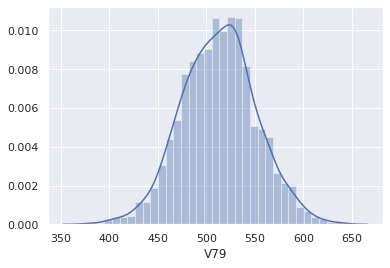

In [8]:
import scipy.stats as stats
import pylab 

col1 =  choice(Xchallenge.columns) # on choisit une variable au hasard

sns.set(style="darkgrid")
sns.distplot(Xchallenge[col1])

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([379, 384, 395, ..., 632, 639, 640])),
 (38.301590924481566, 513.136, 0.999626386354115))

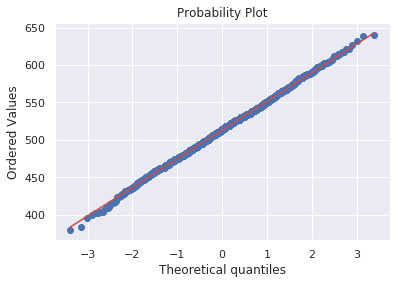

In [9]:
stats.probplot(Xchallenge[col1], dist="norm", plot=pylab)

In [10]:
from scipy.stats import shapiro

stat, p = shapiro(Xchallenge[col1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('la variable semble être Gaussien (on ne rejette pas H0)')
else:
    print('La variable ne semble pas être Gaussien (On rejette H0)')

Statistics=0.999, p=0.582
la variable semble être Gaussien (on ne rejette pas H0)


In [11]:
nombre_de_variable_gaussienne = 0

for col in list(Xchallenge.columns):
    stat, p = shapiro(Xchallenge[col])
    
    if p < 0.05:
        nombre_de_variable_gaussienne += 1
        
print("Nombre de variables non gaussiennes par le test de Shapiro: ",nombre_de_variable_gaussienne)

Nombre de variables non gaussiennes par le test de Shapiro:  210


## 2. Feature engineering

#### a. VarianceThreshold 

In [12]:
variance = 1

Col = Xchallenge.var() > variance
Col = [i for i in Col.index if Col[i]==True]

Col = list(set(Col))
Col.sort()

print("Il y'a",Xchallenge.shape[1] - len(Col),"variables avec une variance inférieure à 1")
print("Nous décidons de les écarter car elles n'apportent aucune information(variance)")

Il y'a 6 variables avec une variance inférieure à 1
Nous décidons de les écarter car elles n'apportent aucune information(variance)


In [13]:
# on supprime les variables avec une faible variance en gardant un jeu de données initiales

Xtrainchallenge_init = Xtrainchallenge.copy()
Xtestchallenge_init = Xtestchallenge.copy()

Xtrainchallenge = Xtrainchallenge[Col] 
Xtestchallenge = Xtestchallenge[Col] 

#### b. RFECV

In [14]:
from sklearn.feature_selection import RFECV

In [15]:
X = Xtrainchallenge
y = Ytrainchallenge

##### RFECV / Séléction récursive de variables avec cross-validation et Decision Tree 

In [17]:
# # Create the RFE object and compute a cross-validated score.
# Features_opt = {}

# for i in range(20):  
#     print(i+1)
#     rfecv = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=5, scoring='accuracy', n_jobs=-1, verbose=5)
#     rfecv.fit(X, y)
#     Features_opt[i+1] = list(X.columns[rfecv.support_])

In [18]:
# # Example of Plot number of features VS. cross-validation scores
# plt.figure(figsize=(10,6))
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [19]:
# Features_opt_bis = {}

# liste = []
# for col in Features_opt.values():
#     liste.extend(col)
    
# Features_opt_bis = dict(Counter(liste))
# Features_opt_bis

# # On met le résultat dans un dataFrame
# df_Features_opt = pd.DataFrame([Features_opt_bis]).rename(index={0: 'Instance'})
# df_Features_opt = df_Features_opt.sort_values(axis=1, by = 'Instance', ascending = False)

## On sauvegarde notre résultat
## df_Features_opt.to_csv(r'/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/data_challenge/df_Features_opt.csv')

#### c. Data Analyse

In [20]:
df_Features_opt = pd.read_csv("/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/data_challenge/df_Features_opt.csv",  sep=',')

In [21]:
print(df_Features_opt)

          V106  V154  V29  V379  V443  V476  V339  V454  V465  V319
Instance    20    20   20    20    20    20    18     5     4     3


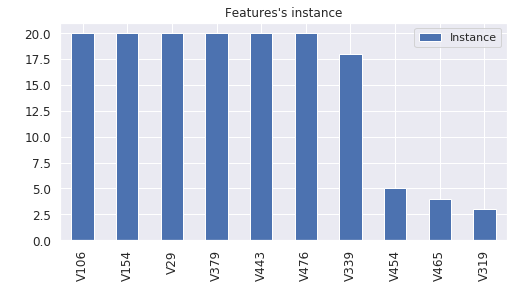

In [22]:
ax = df_Features_opt.T.plot(kind='bar', title ="Features's instance", figsize=(8, 4), legend=True, fontsize=12)
ax.set_xlabel(" ", fontsize=5)
ax.set_ylabel(" ", fontsize=12)
plt.show()

In [23]:
DT_Selected_features = df_Features_opt.columns

##### Pairplot

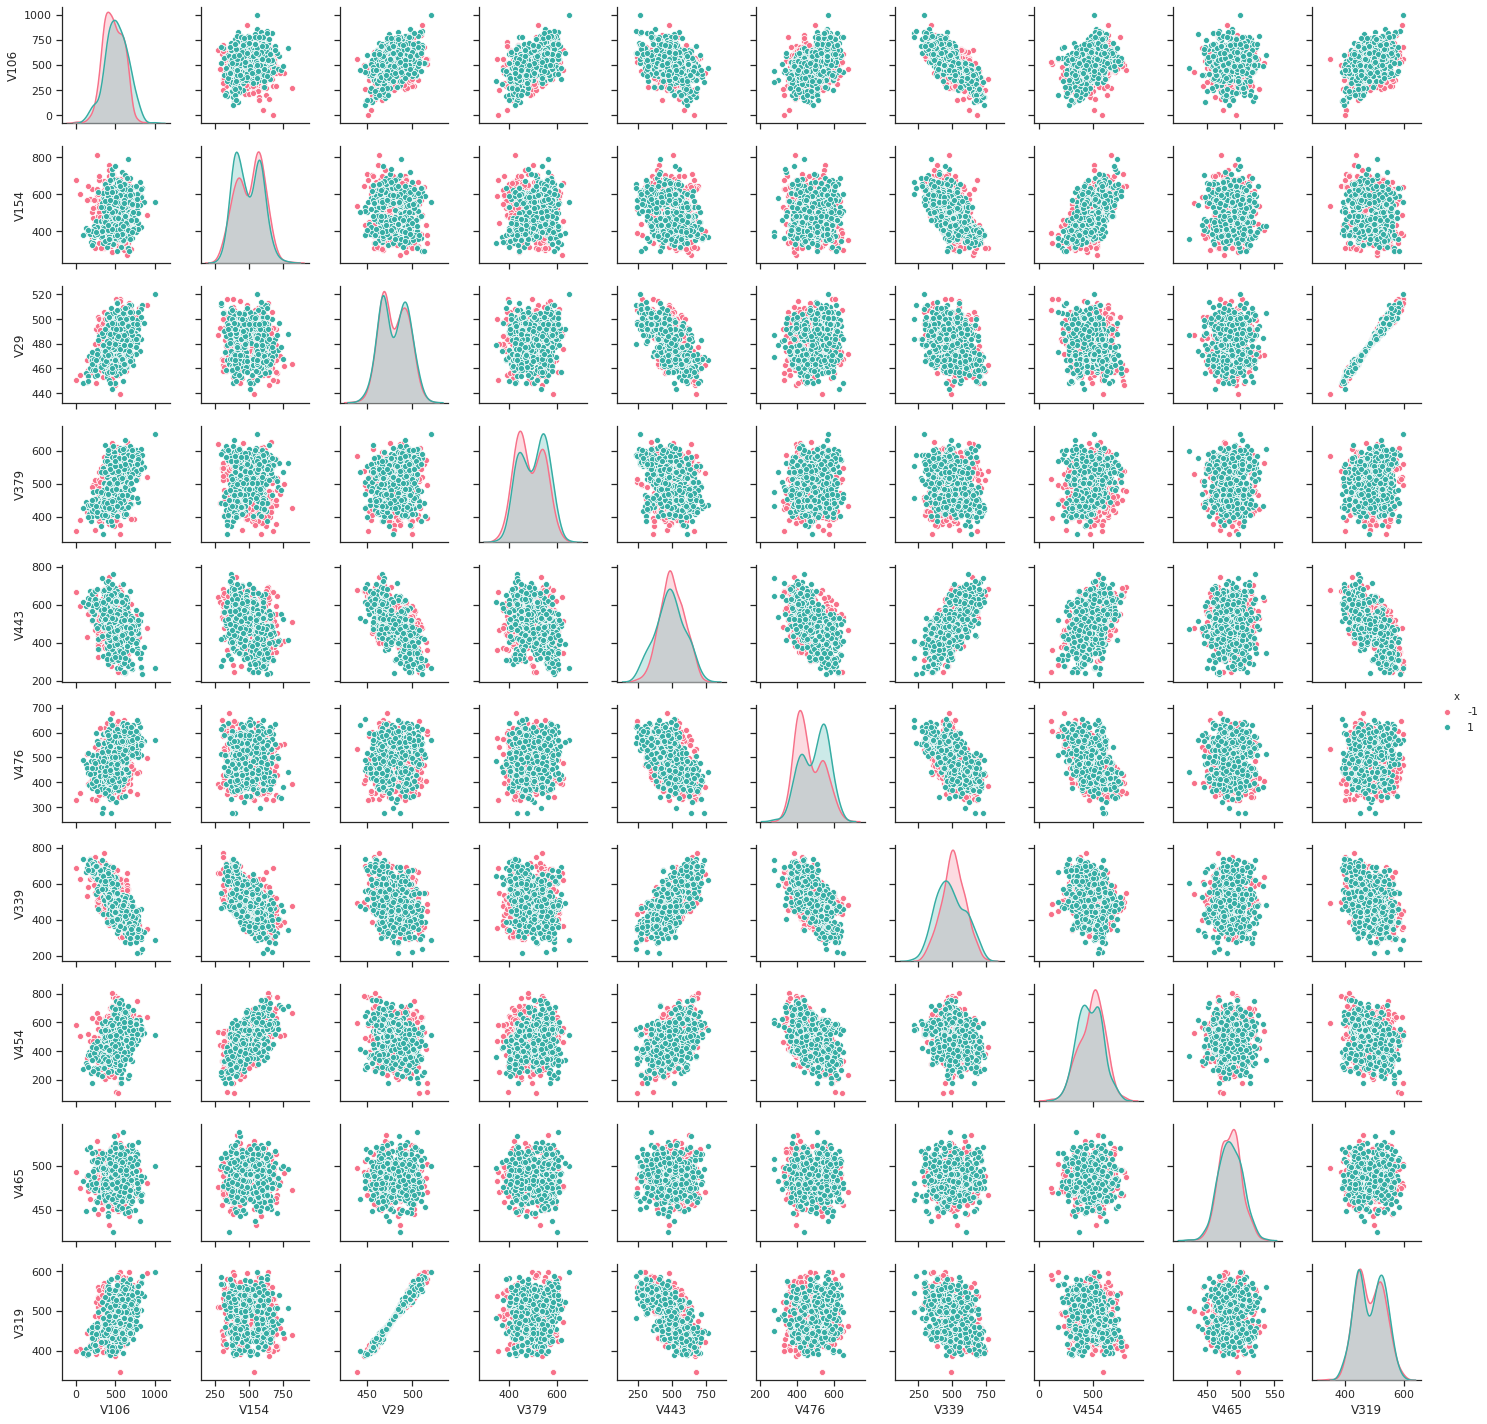

In [24]:
sns.set(style="ticks", color_codes=True)
Pairplot = pd.concat([X, y], axis=1)
g = sns.pairplot(Pairplot, vars=DT_Selected_features, hue="x", height=2, palette="husl")
g

##### Corrélation

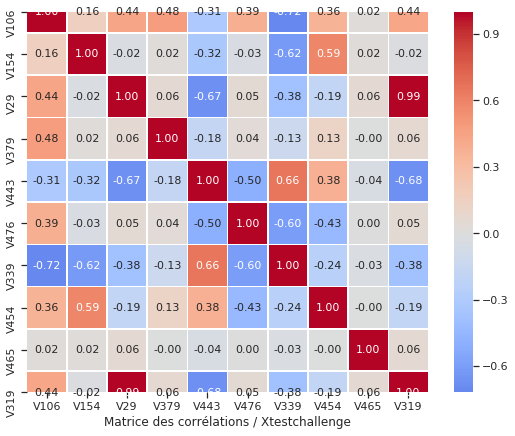

In [25]:
plt.subplots(figsize=(9, 7))
sns.heatmap(X[DT_Selected_features].corr(),cmap='coolwarm', annot_kws={"size": 11}, annot=True, fmt=".2f",vmax=1, center=0, linewidths=.5)
plt.xlabel("Matrice des corrélations / Xtestchallenge")
plt.show()

##### Boxplot 

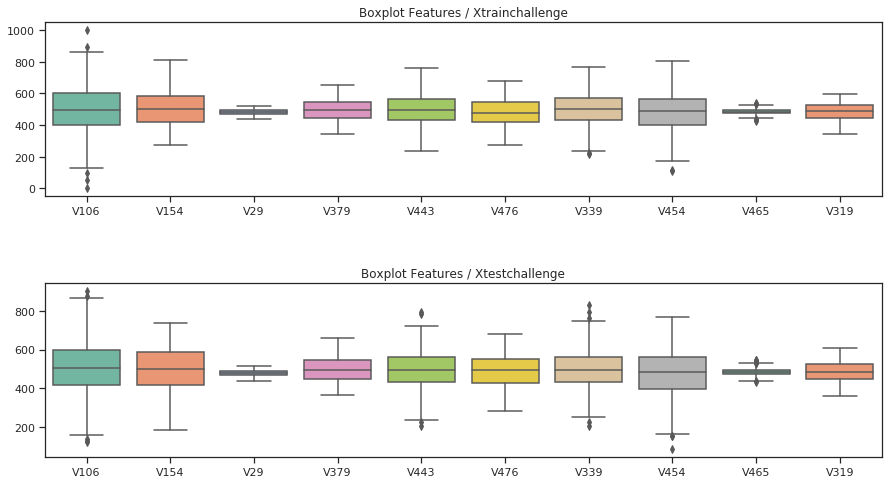

In [26]:
fig = plt.figure(figsize=(15, 8))

plt.gcf().subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title('Boxplot Features / Xtrainchallenge')
ax2.set_title('Boxplot Features / Xtestchallenge')

sns.boxplot(data=Xtrainchallenge[DT_Selected_features], orient="v", palette="Set2", ax=ax1)
sns.boxplot(data=Xtestchallenge[DT_Selected_features], orient="v", palette="Set2", ax=ax2)

##### Normalité / Test de shapiro

In [27]:
for col in DT_Selected_features:
    stat, p = shapiro(Xtrainchallenge[col])
    print(col,":")
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print("On ne rejette pas H0: la variable",col,"semble être Gaussien")
    else:
        print("On rejette H0: la variable",col,"ne semble pas être Gaussien")
    print("")

V106 :
Statistics=0.998, p=0.166
On ne rejette pas H0: la variable V106 semble être Gaussien

V154 :
Statistics=0.973, p=0.000
On rejette H0: la variable V154 ne semble pas être Gaussien

V29 :
Statistics=0.974, p=0.000
On rejette H0: la variable V29 ne semble pas être Gaussien

V379 :
Statistics=0.972, p=0.000
On rejette H0: la variable V379 ne semble pas être Gaussien

V443 :
Statistics=0.996, p=0.006
On rejette H0: la variable V443 ne semble pas être Gaussien

V476 :
Statistics=0.970, p=0.000
On rejette H0: la variable V476 ne semble pas être Gaussien

V339 :
Statistics=0.996, p=0.006
On rejette H0: la variable V339 ne semble pas être Gaussien

V454 :
Statistics=0.996, p=0.009
On rejette H0: la variable V454 ne semble pas être Gaussien

V465 :
Statistics=0.998, p=0.410
On ne rejette pas H0: la variable V465 semble être Gaussien

V319 :
Statistics=0.973, p=0.000
On rejette H0: la variable V319 ne semble pas être Gaussien



In [28]:
Selected_features = list(DT_Selected_features)
Selected_features.remove("V29")
Selected_features.remove("V465")

print("Variables finales:",Selected_features)

Variables finales: ['V106', 'V154', 'V379', 'V443', 'V476', 'V339', 'V454', 'V319']


#### d. Premier essai avec Decision Tree

In [29]:
# X = Xtrainchallenge[Selected_features]
# y = Ytrainchallenge

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# #On vérifie l'équilibre des classes
# print("Total_Train:",y_train.count().x,"/ difference:",y_train.sum().x)
# print("Total_Test:",y_test.count().x,"/ difference:",y_test.sum().x)

In [30]:
# parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":np.arange(5, 13, dtype=int),
#     "min_samples_split": [2, 0.001, 0.005, 0.01, 0.02],
#     "min_samples_leaf": [0.001, 0.0025, 0.005, 0.01, 0.02],
#     "min_impurity_decrease" : [0.001,0.0015,0.002,0.005,0.01],
#     "max_features": [0.5, 0.75, 1., "sqrt"]
# }

# clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, scoring ="accuracy", cv=5, n_jobs=-1,verbose=8)

# clf_DT.fit(X_train, y_train)

In [31]:
# print("Train: ",round(clf_DT.score(X_train, y_train), 2))
# print("Test: ",round(clf_DT.score(X_test, y_test), 2))
# print("\n")
# print(clf_DT.best_params_)

In [32]:
# y_DT = clf_DT.predict(X_test)
# print(classification_report(y_test, y_DT))

In [33]:
# print(confusion_matrix(y_test, y_DT))

In [34]:
# y_pred = y_DT
# y_pred_proba = clf_DT.predict_proba(X_test)[:, 1]
# [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
# # print('Train/Test split results:')
# # print("accuracy is %2.3f" % accuracy_score(y_test, y_pred))
# # print(logreg.__class__.__name__+"log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
# # print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# plt.figure()
# plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
# plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
# plt.ylabel('True Positive Rate (recall)', fontsize=14)
# plt.title('Receiver operating characteristic (ROC) curve')
# plt.legend(loc="lower right")
# plt.show()

# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

## 3. Prédiction / XGBOOST

https://xgboost.readthedocs.io/en/latest/parameter.html

In [35]:
## XGBoost_eval_metric = {"error", "auc", "aucpr", "mlogloss"} et {"Score_Malick"}

# On peut crée soit même son métrique:
def Score_Malick(y_pred, dtrain):
    
    """ XGBoost_eval_metric ne dispose pas du métrique f1_score, on le crée (Score_Malick) """
    
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    
    return 'Score_Malick', err

###### Comment surveiller les performances d'entraînement avec XGBoost afin d'éviter un surajustement ?

#### a. XGBoost avec paramétres simples

In [36]:
# X = Xtrainchallenge[Selected_features]
# y = Ytrainchallenge

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# #On vérifie l'équilibre des classes
# print("Total_Train:",y_train.count().x,"/ difference:",y_train.sum().x)
# print("Total_Test:",y_test.count().x,"/ difference:",y_test.sum().x)

In [37]:
# myXGBoost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree = 1, eta=0.01, gamma=0, Lambda=1.0,
#               max_delta_step=0, max_features=0.5,
#               min_child_weight=1, missing=None, n_jobs=-1,
#               nthread=None, eval_metric ='error', objective='binary:logistic', random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=0.6, verbosity=1)

In [38]:
# parameters = {"n_estimators" : np.arange(5, 105, 5, dtype=int),
#               "learning_rate":  np.arange(0.001, 0.105, 0.01),
#               "max_depth":np.arange(5, 11, dtype=int),}

# clf_XGB = GridSearchCV(myXGBoost, parameters, cv=5, n_jobs=-1,verbose=5)

# eval_set = [(X_train, y_train), (X_test, y_test)]

# clf_XGB.fit(X_train, y_train, early_stopping_rounds=25, eval_metric='error', eval_set=eval_set, verbose=True)

In [39]:
# # On sauvegarde le modéle
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_Version_6'
# joblib.dump(clf_XGB, filename)

# # On charge le modéle sauvegardé
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_Version_6'
# clf_XGB = joblib.load(filename)

In [40]:
# print(clf_XGB.best_params_)

In [41]:
# results= clf_XGB.best_estimator_.evals_result()
# # print(results)

In [42]:
# # Récupérer les mesures de performance
# epochs = len(results['validation_0']['error'])
# x_axis = range(0, epochs)

# # plot erreur de classification Train / Test pendant la phase d'entraînement
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot(x_axis, results['validation_0']['error'], label='Train')
# ax.plot(x_axis, results['validation_1']['error'], label='Test')
# ax.legend()
# plt.ylabel('Classification Error')
# plt.title('XGBoost Classification Error')
# plt.grid()
# plt.show()

In [43]:
# print("Train: ",round(clf_XGB.score(X_train, y_train),2))
# print("Test: ",round(clf_XGB.score(X_test, y_test),2))

In [44]:
# y_myXGB = clf_XGB.predict(X_test)
# print(classification_report(y_test, y_myXGB))

In [45]:
# print(confusion_matrix(y_test, y_myXGB))

In [46]:
# ## plot feature importance
# xgboost.plot_importance(clf_XGB.best_estimator_,max_num_features=10)
# plt.show()

In [47]:
# y_pred = y_myXGB
# y_pred_proba = clf_XGB.predict_proba(X_test)[:, 1]
# [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
# # print('Train/Test split results:')
# # print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
# # print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
# # print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# plt.figure(figsize=(8, 4))
# plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
# plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
# plt.ylabel('True Positive Rate (recall)', fontsize=14)
# plt.title('Receiver operating characteristic (ROC) curve')
# plt.legend(loc="lower right")
# plt.show()

# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

##### Conclusion: 

In [48]:
# y_XGBoost_Version_7 = clf_XGB.predict(Xtestchallenge[Selected_features]) #données de Challenge

# path_XGBoost_Version_7 = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_XGBoost_Version_7.txt'

# np.savetxt(path_XGBoost_Version_7, np.transpose(y_XGBoost_Version_7),fmt='% 0d')

#### b. XGBoost tunning avec "hyperopt"

https://medium.com/district-data-labs/parameter-tuning-with-hyperopt-faa86acdfdce

In [62]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=f, space=fspace, algo=tpe.suggest, max_evals=1000, trials=trials)

print('best:', best)
# print('trials:')
# for trial in trials.trials[:2]:
#     print(trial)

100%|██████████| 1000/1000 [00:07<00:00, 140.17it/s, best loss: 2.1157963863805503e-06]
best: {'x': 0.0014545777347328504}
trials:


Text(0, 0.5, '$x$')

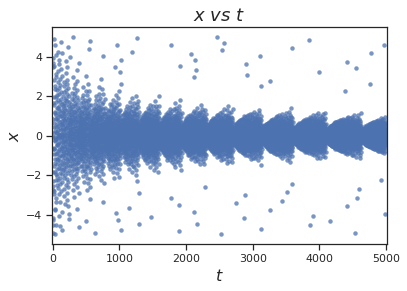

In [61]:
#Visualization
f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

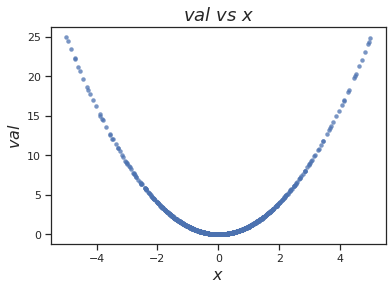

In [63]:
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

In [86]:
X = Xtrainchallenge[Selected_features]
y = Ytrainchallenge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#On vérifie l'équilibre des classes
print("Total_Train:",y_train.count().x,"/ difference:",y_train.sum().x)
print("Total_Test:",y_test.count().x,"/ difference:",y_test.sum().x)

Total_Train: 700 / difference: 4
Total_Test: 300 / difference: -2


In [64]:
# # les métriques de sklearn
sklearn.metrics.SCORERS.keys() 

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

##### Create the objective function

In [145]:
def objective(space):
    # Instantiate the classifier
    clf = xgboost.XGBClassifier(n_jobs=-1, eval_metric ='error', objective='binary:logistic',booster='gbtree',
                                n_estimators =space['n_estimators'],
                                max_features =space['max_features'],
                                max_depth = int(space['max_depth']),
                                colsample_bytree=space['colsample_bytree'],
                                learning_rate = space['learning_rate'],
                                subsample = space['subsample'],
                                min_child_weight = space['min_child_weight'],
                                gamma = space['gamma'],
                                alpha = space['alpha'],
                                eta = space['eta'])
    
    eval_set  = [(X_train, y_train), (X_test, y_test)]
    
    # Fit the classsifier
    clf.fit(X_train, y_train, early_stopping_rounds=25, eval_metric='error', eval_set=eval_set, verbose=False)
    
    # Predict on Cross Validation data
    pred = clf.predict(X_test)
    
    # Calculate our Metric - accuracy
    acc = accuracy_score(y_test, pred)

    # return needs to be in this below format. We use negative of accuracy since we want to maximize it.
    return {'loss': 1-acc, 'status': STATUS_OK }

##### Create the Space for your classifier 

In [146]:
space = {
    "eta" : hp.uniform("eta", 0.005, 0.2),
    "gamma" : hp.uniform("gamma", 0.5, 1),
    "alpha" : hp.choice("alpha", range(0, 5, 2)),
    'min_child_weight': hp.quniform('min_child', 1, 10, 1),
    "subsample" : hp.uniform("subsample", 0.5, 1),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.7, 1),
    "learning_rate":  hp.uniform("learning_rate", 0.001, 0.105),
    "max_depth": hp.choice("max_depth", range(5, 13, 1)),
    "max_features":hp.choice("max_features", [0.5, 0.75, 1]),
    'n_estimators' : hp.choice('n_estimators', [20,30,40,50,60,70,80,90,100, 200, 300, 400]),
    }

##### Run Hyperopt 

In [147]:
MAX_EVALS = 2000

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=MAX_EVALS,
            trials=trials)
print('best:', best)

100%|██████████| 1000/1000 [03:21<00:00,  3.69it/s, best loss: 0.13]             
best: {'alpha': 2, 'colsample_bytree': 0.77015036641328, 'eta': 0.09273981456453374, 'gamma': 0.7186111639432269, 'learning_rate': 0.07730506586717001, 'max_depth': 5, 'max_features': 2, 'min_child': 1.0, 'n_estimators': 11, 'subsample': 0.9367306962443633}


In [148]:
best

{'alpha': 2,
 'colsample_bytree': 0.77015036641328,
 'eta': 0.09273981456453374,
 'gamma': 0.7186111639432269,
 'learning_rate': 0.07730506586717001,
 'max_depth': 5,
 'max_features': 2,
 'min_child': 1.0,
 'n_estimators': 11,
 'subsample': 0.9367306962443633}

int

In [149]:
parameters = best # les paramétres optimaux obtenus avec Hyperopt

In [150]:
myXGBoost = XGBClassifier(n_jobs=-1, eval_metric ='error', objective='binary:logistic',booster='gbtree')

In [157]:
clf_XGBOOST_Version_Hyperopt = GridSearchCV(myXGBoost, parameters, cv=5, n_jobs=-1,verbose=5)

eval_set = [(X_train, y_train), (X_test, y_test)]

clf_XGBOOST_Version_Hyperopt.fit(X_train, y_train, early_stopping_rounds=25, eval_metric='error', eval_set=eval_set, verbose=True)

ValueError: Parameter values for parameter (alpha) need to be a sequence(but not a string) or np.ndarray.

In [ ]:
# # On sauvegarde le modéle
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_Version_Hyperopt'
# joblib.dump(clf_XGBOOST_Version_Hyperopt, filename)

# # On charge le modéle sauvegardé
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_Version_Hyperopt'
# clf_XGBOOST_Version_Hyperopt = joblib.load(filename)

In [ ]:
# results= clf_XGB.best_estimator_.evals_result()

In [ ]:
# # Récupérer les mesures de performance
# epochs = len(results['validation_0']['error'])
# x_axis = range(0, epochs)

# # plot erreur de classification Train / Test pendant la phase d'entraînement
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot(x_axis, results['validation_0']['error'], label='Train')
# ax.plot(x_axis, results['validation_1']['error'], label='Test')
# ax.legend()
# plt.ylabel('Classification Error')
# plt.title('XGBoost Classification Error')
# plt.grid()
# plt.show()

In [ ]:
# print("Train: ",round(clf_XGB.score(X_train, y_train),2))
# print("Test: ",round(clf_XGB.score(X_test, y_test),2))

In [ ]:
# y_myXGB = clf_XGB.predict(X_test)
# print(classification_report(y_test, y_myXGB))

In [ ]:
# print(confusion_matrix(y_test, y_myXGB))

In [ ]:
# ## plot feature importance
# xgboost.plot_importance(clf_XGB.best_estimator_,max_num_features=10)
# plt.show()

In [ ]:
# y_pred = y_myXGB
# y_pred_proba = clf_XGB.predict_proba(X_test)[:, 1]
# [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
# # print('Train/Test split results:')
# # print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
# # print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
# # print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# plt.figure(figsize=(8, 4))
# plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
# plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
# plt.ylabel('True Positive Rate (recall)', fontsize=14)
# plt.title('Receiver operating characteristic (ROC) curve')
# plt.legend(loc="lower right")
# plt.show()

# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# y_XGBoost_Version_7 = clf_XGB.predict(Xtestchallenge[Selected_features]) #données de Challenge

# path_XGBoost_Version_7 = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_XGBoost_Version_7.txt'

# np.savetxt(path_XGBoost_Version_7, np.transpose(y_XGBoost_Version_7),fmt='% 0d')

##### Conclusion: 